In [49]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
from datetime import datetime

In [52]:
symbols = ["ESEA", "SGE.L", "ORCL"]
#EuroSeas Ltd, SAGE, Oracle
start_date = datetime(2021, 1, 1)
end_date = datetime.today()
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
#print(stock_data.info())

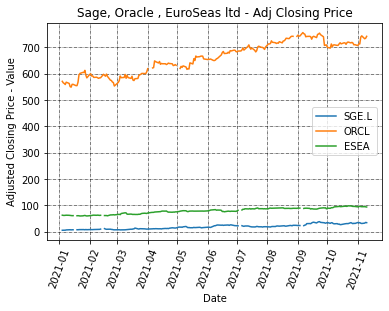

In [86]:
stock_data = stock_data.reset_index()
x_values = stock_data['Date']
y_values = stock_data['Adj Close']
plt.plot(x_values, y_values)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price - Value")
plt.title("Sage, Oracle , EuroSeas ltd - Adj Closing Price")
plt.legend(['SGE.L', 'ORCL', 'ESEA'])
plt.xticks(rotation = 70)
plt.show()

In [54]:
daily_returns = stock_data['Adj Close'].pct_change()
daily_returns_cov = daily_returns.cov()
print(daily_returns_cov)

Symbols      ESEA     SGE.L      ORCL
Symbols                              
ESEA     0.004636 -0.000030  0.000002
SGE.L   -0.000030  0.000143  0.000002
ORCL     0.000002  0.000002  0.000222


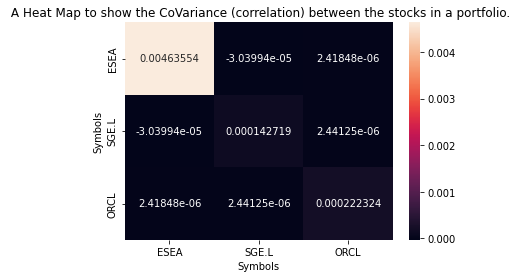

In [87]:
import seaborn as sn
sn.heatmap(daily_returns_cov, annot=True, fmt='g')
plt.title(" A Heat Map to show the CoVariance (correlation) between the stocks in a portfolio.")
plt.show()

In [55]:
print("Oracle has a CoVariance of Zero with both EuroSeas and Sage. Thereby reducing the risk of the portfolio. As the only way to reduce the risk of a portfolio, is to have stocks that are not correlated at all (Cov = 0). Futhermore, ESEA has a negative correlation with SGE.L but all other correlations are positive. This greatly reduces the risk in a portfolio.")


Oracle has a CoVariance of Zero with both EuroSeas and Sage. Thereby reducing the risk of the portfolio. As the only way to reduce the risk of a portfolio, is to have stocks that are not correlated at all (Cov = 0). Futhermore, ESEA has a negative correlation with SGE.L but all other correlations are positive. This greatly reduces the risk in a portfolio.


In [56]:
symbol_list = ['ESEA', 'SGE.L', 'ORCL']
pe_list = []
for symbol in symbol_list:
    x = web.get_quote_yahoo(symbol)['trailingPE']
    pe_list.append(x[0])

    

In [57]:
print(pe_list)

[18.830315, 35.521534, 19.879238]


In [58]:
df1= pd.DataFrame({'Ticker':symbol_list, 'pe': pe_list})
print(df1)

  Ticker         pe
0   ESEA  18.830315
1  SGE.L  35.521534
2   ORCL  19.879238


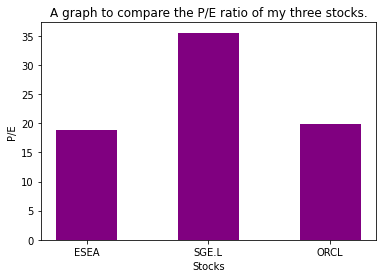

In [73]:
plt.bar(df1['Ticker'], df1['pe'], width=0.5, color='purple')
plt.title("A graph to compare the P/E ratio of my three stocks.")
plt.ylabel("P/E")
plt.xlabel("Stocks")
plt.show()

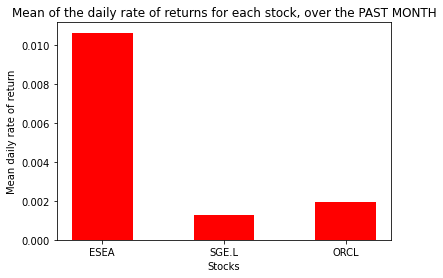

In [75]:
start_date_2 = datetime(2021, 10, 1)
end_date_2 = datetime.today()
stock_data_2 = web.get_data_yahoo(symbols, start_date, end_date)
daily_returns_2 = stock_data['Adj Close'].pct_change()

ESEA_mean_ror = daily_returns_2["ESEA"].mean()
SGE_mean_ror = daily_returns_2["SGE.L"].mean()
ORCL_mean_ror = daily_returns_2["ORCL"].mean()

y_values = [ESEA_mean_ror, SGE_mean_ror, ORCL_mean_ror]
x_values = ["ESEA", "SGE.L", "ORCL"]
plt.bar(x_values, y_values, width=0.5, color='red')
plt.title("Mean of the daily rate of returns for each stock, over the PAST MONTH")
plt.ylabel("Mean daily rate of return")
plt.xlabel("Stocks")
plt.show()

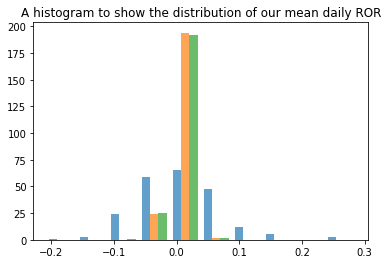

In [61]:
plt.hist(daily_returns_2, alpha=0.7)
plt.title("A histogram to show the distribution of our mean daily ROR")
plt.show()

In [62]:
print("The histogram is normally distributed (most of our data points are centred around the mean). Thus, it is suitable for a T-Test.")

The histogram is normally distributed (most of our data points are centred around the mean). Thus, it is suitable for a T-Test


In [63]:
print("A Two-Sample-T-Test between EuroSeas and Oracle.")
print("The Two-Sample T-Test is used to determine if two data set means are equal.")
print("In the majority of analyses, an alpha of 0.05 is used as the cutoff for significance. If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. A p-value is not a negotiation: if p > 0.05, the results are not significant.")
print(" ")
print("H0: The daily ROR for Oracle and Euroseas is similar.")
print("H1: The daily ROR for Oracle and EuroSeas is very different.")

A Two-Sample-T-Test between EuroSeas and Oracle.
The Two-Sample T-Test is used to determine if two data set means are equal.
In the majority of analyses, an alpha of 0.05 is used as the cutoff for significance. If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. A p-value is not a negotiation: if p > 0.05, the results are not significant.
 
H0: The daily ROR for Oracle and Euroseas is similar.
H1: The daily ROR for Oracle and EuroSeas is very different.


In [64]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(daily_returns_2.dropna()['ESEA'], daily_returns_2.dropna()['ORCL'])

In [65]:
print("pval: " + str(pval))

pval: 0.06542535635112127


In [66]:
print("The P_Val is > 0.05 therefore it is not signficant and we accept the Null (H0). No difference exists betweens the means.")

The P_Val is > 0.05 therefore it is not signficant and we accept the Null (H0). No difference exists betweens the means.


In [67]:
print("The daily rate of return looks close for SAGE and ORACLE.")
tstat, pval = ttest_ind(daily_returns_2.dropna()['SGE.L'], daily_returns_2.dropna()['ORCL'])
print("The pval is " + str(pval))

The daily rate of return looks close for SAGE and ORACLE.
The pval is 0.5990501543644409


In [88]:
print("Here the pval is higher than 0.05 therefore there is no difference between the means.")

Here the pval is higher than 0.05 therefore there is no difference between the means.


In [90]:
print("The reasoning behind my choice of stocks...")
print(" ")
print("ESEA (EuroSeas Ltd)")
print(" ")
print("I analysed their financial statements (Balance Sheet and Income Statement)")
print("")
print("- Year-To-year Cash: Increased by 40% - A positive\n- Long Term Debt: Decreased by 27% - A Positive\n- Shares Outstanding: Increased by 17% - A Negative (Due to dilution)\n- Earnings Per Share: Increased by 315% - A Positive\n- Inventories: Decreased by 8% - A Positive")
print("")
print("The P/E ratio for EuroSeas Ltd stock is 19.35. If the P/E ratio is less than the growth rate, you have found a bargain. 19.35 < 315. Overall the company has a strong balance sheet with Equity > Debt.")
print(" ")
print("ORCL (ORACLE) & SGE.L (SAGE Group)")
print(" ")
print("Peter Lynch's investment advice includes the following, invest in what you know about. I have years of experience within accounting and experience with both of these respective companies software. I have used numerous different accounting operating systems, and consider SAGE to be one of the best. At a recent company we moved from Sage to Xero, but decided to move back to Sage. I also took on a contract position to assist a company that was moving all of their accounting data from their previous operating system to Oracle. Which lead me to conclude that the demand for Oracle software will stay.")
print(" ")


The reasoning behind my choice of stocks...
 
ESEA (EuroSeas Ltd)
 
I analysed their financial statements (Balance Sheet and Income Statement)

- Year-To-year Cash: Increased by 40% - A positive
- Long Term Debt: Decreased by 27% - A Positive
- Shares Outstanding: Increased by 17% - A Negative (Due to dilution)
- Earnings Per Share: Increased by 315% - A Positive
- Inventories: Decreased by 8% - A Positive

The P/E ratio for EuroSeas Ltd stock is 19.35. If the P/E ratio is less than the growth rate, you have found a bargain. 19.35 < 315. Overall the company has a strong balance sheet with Equity > Debt.
 
ORCL (ORACLE) & SGE.L (SAGE Group)
 
Peter Lynch's investment advice includes the following, invest in what you know about. I have years of experience within accounting and experience with both of these respective companies software. I have used numerous different accounting operating systems, and consider SAGE to be one of the best. At a recent company we moved from Sage to Xero, but